In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

#  Matches

In [2]:
matches_df = pd.read_csv('spi_matches_latest.csv')

In [3]:
matches_df.shape

(11737, 23)

In [4]:
matches_df.head()

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2019,2019-03-01,1979,Chinese Super League,Shandong Luneng,Guizhou Renhe,48.22,37.83,0.5755,0.1740,...,45.9,22.1,1.0,0.0,1.39,0.26,2.05,0.54,1.05,0.00
1,2019,2019-03-01,1979,Chinese Super League,Shanghai Greenland,Shanghai SIPG,39.81,60.08,0.2387,0.5203,...,25.6,63.4,0.0,4.0,0.57,2.76,0.80,1.50,0.00,3.26
2,2019,2019-03-01,1979,Chinese Super League,Guangzhou Evergrande,Tianjin Quanujian,65.59,39.99,0.7832,0.0673,...,77.1,28.8,3.0,0.0,0.49,0.45,1.05,0.75,3.15,0.00
3,2019,2019-03-01,1979,Chinese Super League,Wuhan Zall,Beijing Guoan,32.25,54.82,0.2276,0.5226,...,35.8,58.9,0.0,1.0,1.12,0.97,1.51,0.94,0.00,1.05
4,2019,2019-03-01,1979,Chinese Super League,Chongqing Lifan,Guangzhou RF,38.24,40.45,0.4403,0.2932,...,26.2,21.3,2.0,2.0,2.77,3.17,1.05,2.08,2.10,2.10


In [5]:
matches_df['league'].unique()

array(['Chinese Super League', 'NWSL Challenge Cup',
       'Mexican Primera Division Torneo Apertura', 'Danish SAS-Ligaen',
       'Russian Premier Liga', 'German 2. Bundesliga',
       'Swiss Raiffeisen Super League', 'Austrian T-Mobile Bundesliga',
       'Belgian Jupiler League', 'English League Championship',
       'Scottish Premiership', 'French Ligue 2', 'English League Two',
       'English League One', 'South African ABSA Premier League',
       'Turkish Turkcell Super Lig', 'Dutch Eredivisie',
       'German Bundesliga', 'French Ligue 1', 'Barclays Premier League',
       'Portuguese Liga', 'Italy Serie B', 'Spanish Segunda Division',
       'Spanish Primera Division', 'Italy Serie A', 'Greek Super League',
       'UEFA Champions League', 'UEFA Europa Conference League',
       'UEFA Europa League', "FA Women's Super League",
       'Australian A-League', 'Mexican Primera Division Torneo Clausura',
       'Argentina Primera Division', 'Japanese J League',
       'Major Leagu

In [6]:
english_matches = matches_df[matches_df['league'] == 'Barclays Premier League']
english_matches.shape

(380, 23)

In [7]:
english_matches.head()

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
501,2022,2022-08-05,2411,Barclays Premier League,Crystal Palace,Arsenal,71.36,78.53,0.3159,0.4205,...,22.8,48.6,0.0,2.0,1.30,1.36,1.40,2.41,0.00,1.72
508,2022,2022-08-06,2411,Barclays Premier League,Fulham,Liverpool,58.70,90.51,0.0926,0.7466,...,39.7,68.2,2.0,2.0,1.25,2.57,0.78,1.41,2.10,2.10
526,2022,2022-08-06,2411,Barclays Premier League,Newcastle,Nottingham Forest,68.65,57.31,0.5401,0.2045,...,30.4,42.6,2.0,0.0,1.82,0.26,3.33,0.48,1.90,0.00
530,2022,2022-08-06,2411,Barclays Premier League,AFC Bournemouth,Aston Villa,57.92,74.05,0.2719,0.4687,...,40.2,28.8,2.0,0.0,0.49,0.68,0.79,1.95,1.84,0.00
556,2022,2022-08-06,2411,Barclays Premier League,Leeds United,Wolverhampton,62.15,67.72,0.3941,0.3456,...,33.5,23.5,2.0,1.0,0.84,1.11,1.02,2.58,2.10,1.05


In [8]:
english_matches.dtypes

season           int64
date            object
league_id        int64
league          object
team1           object
team2           object
spi1           float64
spi2           float64
prob1          float64
prob2          float64
probtie        float64
proj_score1    float64
proj_score2    float64
importance1    float64
importance2    float64
score1         float64
score2         float64
xg1            float64
xg2            float64
nsxg1          float64
nsxg2          float64
adj_score1     float64
adj_score2     float64
dtype: object

In [9]:
english_matches.sort_values(by='score1', ascending=False).head(5)

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
1174,2022,2022-08-27,2411,Barclays Premier League,Liverpool,AFC Bournemouth,88.83,57.47,0.8292,0.0477,...,59.7,40.8,9.0,0.0,4.47,0.25,2.85,0.61,8.82,0.00
6574,2022,2023-03-05,2411,Barclays Premier League,Liverpool,Manchester United,82.88,81.35,0.4882,0.2924,...,68.1,48.6,7.0,0.0,3.66,0.83,2.04,0.87,6.42,0.00
2026,2022,2022-09-17,2411,Barclays Premier League,Tottenham Hotspur,Leicester City,81.87,67.43,0.6422,0.1584,...,60.9,31.7,6.0,2.0,2.45,1.78,1.60,1.18,5.48,2.10
8496,2022,2023-04-23,2411,Barclays Premier League,Newcastle,Tottenham Hotspur,80.50,74.32,0.5475,0.2263,...,93.1,50.4,6.0,1.0,3.75,1.12,2.80,0.40,6.30,1.05
2325,2022,2022-10-02,2411,Barclays Premier League,Manchester City,Manchester United,92.98,75.94,0.7386,0.1028,...,77.9,58.6,6.0,3.0,3.20,1.71,2.82,0.71,6.25,3.15


Highest scoring home team sides for individual games in the 2022 season. Liverpool scored 9 at home vs Bournemouth and 7 at home vs United

In [10]:
english_matches.sort_values(by='score2', ascending=False).head(5)

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
8224,2022,2023-04-17,2411,Barclays Premier League,Leeds United,Liverpool,63.04,83.76,0.2128,0.5910,...,35.9,29.2,1.0,6.0,1.32,2.63,0.86,1.91,1.05,5.72
7593,2022,2023-04-05,2411,Barclays Premier League,West Ham United,Newcastle,72.28,81.67,0.2715,0.4608,...,24.5,74.5,1.0,5.0,0.93,2.31,0.77,1.75,1.05,4.45
7800,2022,2023-04-09,2411,Barclays Premier League,Leeds United,Crystal Palace,66.50,69.48,0.4432,0.2862,...,31.4,8.7,1.0,5.0,0.96,3.08,1.48,1.94,1.05,5.08
9223,2022,2023-05-08,2411,Barclays Premier League,Brighton and Hove Albion,Everton,82.75,60.10,0.6618,0.1515,...,25.3,93.2,1.0,5.0,3.19,2.60,3.54,1.59,1.05,4.58
3160,2022,2022-10-23,2411,Barclays Premier League,Wolverhampton,Leicester City,65.60,67.32,0.4007,0.3309,...,46.4,40.8,0.0,4.0,1.92,1.00,2.12,0.83,0.00,3.97


Here we see Liverpool again as the highest scoring (for an individual game) away team for the 2022 season where they scored 6 against Leeds

In [11]:
english_matches['combined_scores'] = english_matches['score1'] + english_matches['score2']
df_sorted = english_matches.sort_values(by='combined_scores', ascending=False).head(5)
df_sorted

C:\Users\cbara\AppData\Local\Temp\ipykernel_7472\3051532509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_matches['combined_scores'] = english_matches['score1'] + english_matches['score2']


,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,combined_scores
1174,2022,2022-08-27,2411,Barclays Premier League,Liverpool,AFC Bournemouth,88.83,57.47,0.8292,0.0477,...,40.8,9.0,0.0,4.47,0.25,2.85,0.61,8.82,0.00,9.0
2325,2022,2022-10-02,2411,Barclays Premier League,Manchester City,Manchester United,92.98,75.94,0.7386,0.1028,...,58.6,6.0,3.0,3.20,1.71,2.82,0.71,6.25,3.15,9.0
9217,2022,2023-05-08,2411,Barclays Premier League,Fulham,Leicester City,67.01,66.69,0.3616,0.3836,...,73.9,5.0,3.0,1.68,3.34,1.40,0.96,5.25,3.15,8.0
2026,2022,2022-09-17,2411,Barclays Premier League,Tottenham Hotspur,Leicester City,81.87,67.43,0.6422,0.1584,...,31.7,6.0,2.0,2.45,1.78,1.60,1.18,5.48,2.10,8.0
9997,2022,2023-05-28,2411,Barclays Premier League,Southampton,Liverpool,57.33,84.09,0.2613,0.5196,...,0.0,4.0,4.0,1.41,4.06,0.96,2.97,4.20,4.20,8.0


The highest scoring overall matches of the season both featured 9 goals. One was a 9-0 one sided defeat to Bournemouth by Liverpool and the other was a 6-3 Manchester derby in which City was victorious

In [12]:
#fig, ax = plt.subplots()
#ax.hist(english_matches['combined_scores'], bins=10)

#ax.set_xlabel('combined goals scored')
#ax.set_ylabel('matches')
#ax.set_title('Combined goals scored in 2022 EPL Season')
#plt.show()


In [13]:
spanish_matches = matches_df[matches_df['league'] == 'Spanish Primera Division']
german_matches = matches_df[matches_df['league'] == 'German Bundesliga']
italy_matches = matches_df[matches_df['league'] == 'Italy Serie A']

spanish_matches['combined_scores'] = spanish_matches['score1'] + spanish_matches['score2']
german_matches['combined_scores'] = german_matches['score1'] + german_matches['score2']
italy_matches['combined_scores'] = italy_matches['score1'] + italy_matches['score2']

C:\Users\cbara\AppData\Local\Temp\ipykernel_7472\3380731218.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spanish_matches['combined_scores'] = spanish_matches['score1'] + spanish_matches['score2']
C:\Users\cbara\AppData\Local\Temp\ipykernel_7472\3380731218.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  german_matches['combined_scores'] = german_matches['score1'] + german_matches['score2']
C:\Users\cbara\AppData\Local\Temp\ipykernel_7472\3380731218.py:7: SettingWithCopyWarning: 
A value is trying 

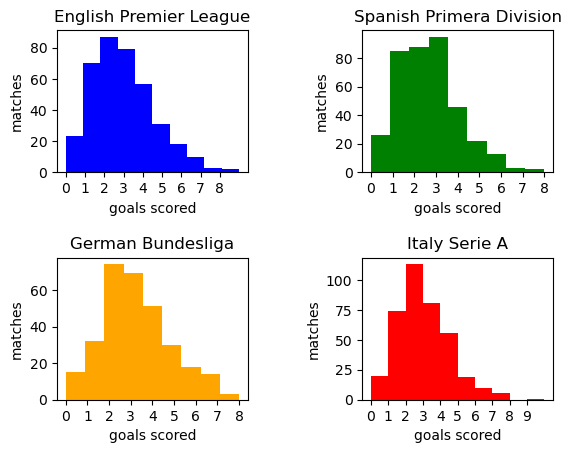

In [14]:
fig, axs = plt.subplots(2,2)
plt.subplots_adjust(wspace=0.6, hspace=0.6)

axs[0,0].hist(english_matches['combined_scores'], bins=10, color='blue')
axs[0,0].set_title('English Premier League')
axs[0,0].set_xticks(np.arange(0, 9, 1))

axs[0,1].hist(spanish_matches['combined_scores'], bins=9, color='green')
axs[0,1].set_title('Spanish Primera Division')
axs[0,1].set_xticks(np.arange(0, 9, 1))

axs[1,0].hist(german_matches['combined_scores'], bins=9, color='orange')
axs[1,0].set_title('German Bundesliga')
axs[1,0].set_xticks(np.arange(0, 9, 1))

axs[1,1].hist(italy_matches['combined_scores'], bins=10, color='red')
axs[1,1].set_title('Italy Serie A')
axs[1,1].set_xticks(np.arange(0, 10, 1))

for ax in axs.flat:
    ax.set(xlabel='goals scored', ylabel='matches')

In [15]:
#probably shouldve made this a function!! too much reused code
e_teams = english_matches['team1'].unique()
combined_goals_arr = []
for team in e_teams:
    home_goals = english_matches[english_matches['team1'] == team].sum().score1
    away_goals = english_matches[english_matches['team2'] == team].sum().score2
    total_goals = home_goals + away_goals
    combined_goals_arr.append(total_goals)

s_teams = spanish_matches['team1'].unique()
s_combined_goals_arr = []
for team in s_teams:
    home_goals = spanish_matches[spanish_matches['team1'] == team].sum().score1
    away_goals = spanish_matches[spanish_matches['team2'] == team].sum().score2
    total_goals = home_goals + away_goals
    s_combined_goals_arr.append(total_goals)
    
g_teams = german_matches['team1'].unique()
g_combined_goals_arr = []
for team in g_teams:
    home_goals = german_matches[german_matches['team1'] == team].sum().score1
    away_goals = german_matches[german_matches['team2'] == team].sum().score2
    total_goals = home_goals + away_goals
    g_combined_goals_arr.append(total_goals)
    
i_teams = italy_matches['team1'].unique()
i_combined_goals_arr = []
for team in i_teams:
    home_goals = italy_matches[italy_matches['team1'] == team].sum().score1
    away_goals = italy_matches[italy_matches['team2'] == team].sum().score2
    total_goals = home_goals + away_goals
    i_combined_goals_arr.append(total_goals)

In [16]:
e_teams_tot_goals = pd.DataFrame(list(zip(e_teams, combined_goals_arr)), columns = ['Team', 'Goals Scored'])
s_teams_tot_goals = pd.DataFrame(list(zip(s_teams, s_combined_goals_arr)), columns = ['Team', 'Goals Scored'])
g_teams_tot_goals = pd.DataFrame(list(zip(g_teams, g_combined_goals_arr)), columns = ['Team', 'Goals Scored'])
i_teams_tot_goals = pd.DataFrame(list(zip(i_teams, i_combined_goals_arr)), columns = ['Team', 'Goals Scored'])

In [17]:
e_teams_tot_goals['League'] = 'English Premier'
s_teams_tot_goals['League'] = 'Primera Division'
g_teams_tot_goals['League'] = 'Bundesliga'
i_teams_tot_goals['League'] = 'Serie A'

In [18]:
tot_goals_merged = pd.concat([e_teams_tot_goals, s_teams_tot_goals, g_teams_tot_goals, i_teams_tot_goals], 
                             ignore_index=True, sort=False)

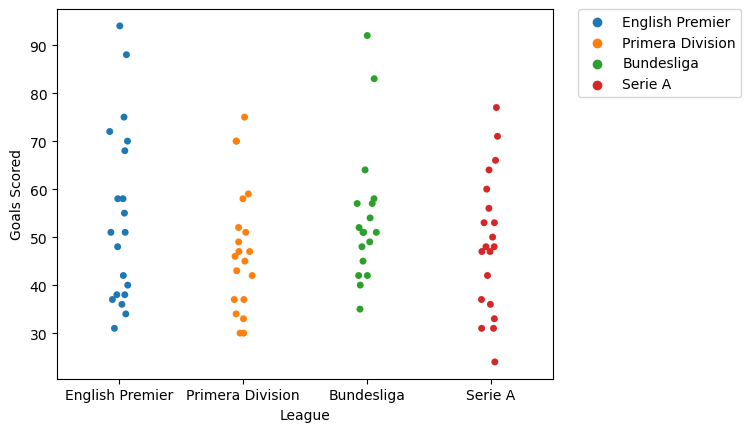

In [19]:
sns.stripplot(x='League', y='Goals Scored', data=tot_goals_merged, jitter=0.08, hue='League')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

Top 5 Leagues by Average Team SPI

In [20]:
#matches_df.groupby('league').mean(numeric_only=True).sort_values(by='spi1', ascending=False).head(5)
group_mean_matches_df = matches_df.groupby('league').mean(numeric_only=True)
group_mean_matches_df[['spi1', 'spi2']].sort_values(by='spi1', ascending=False).head(5)

,spi1,spi2
league,,
UEFA Champions League,76.900320,76.721040
Barclays Premier League,71.993947,72.036079
German Bundesliga,68.852582,68.815686
Spanish Primera Division,67.943842,68.086579
UEFA Europa League,63.075177,63.095177


Top 5 Leagues by Goals Scored by Home Team

In [21]:
group_mean_matches_df[['score1', 'score2']].sort_values(by='score1', ascending=False).head(5)

,score1,score2
league,,
German Bundesliga,1.856209,1.316993
FA Women's Super League,1.787879,1.537879
Norwegian Tippeligaen,1.759036,1.204819
Chinese Super League,1.733333,1.354167
Dutch Eredivisie,1.728758,1.326797


Top 5 Leagues by Goals Scored by Away Team

In [22]:
group_mean_matches_df[['score1', 'score2']].sort_values(by='score2', ascending=False).head(5)

,score1,score2
league,,
FA Women's Super League,1.787879,1.537879
Austrian T-Mobile Bundesliga,1.541237,1.427835
Belgian Jupiler League,1.651515,1.412121
Turkish Turkcell Super Lig,1.663743,1.380117
Chinese Super League,1.733333,1.354167


Top 5 Leagues by Goals Scored by Either Team

In [23]:
group_mean_matches_df['avg_score'] = (group_mean_matches_df['score1'] + group_mean_matches_df['score2']) / 2
group_mean_matches_df[['avg_score']].sort_values(by='avg_score', ascending=False).head(5)

,avg_score
league,
FA Women's Super League,1.662879
German Bundesliga,1.586601
Chinese Super League,1.543750
Australian A-League,1.533742
Belgian Jupiler League,1.531818


# Simulations

In [45]:
m_city_matches = english_matches[(english_matches['team1'] == 'Manchester City') | 
                                 (english_matches['team2'] == 'Manchester City')]
m_city_matches = m_city_matches.reset_index()

In [52]:
m_city_matches.iloc[:1]

,index,season,date,league_id,league,team1,team2,spi1,spi2,prob1,...,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,combined_scores
0,629,2022,2022-08-07,2411,Barclays Premier League,West Ham United,Manchester City,70.62,92.31,0.1317,...,73.8,0.0,2.0,0.34,2.39,0.58,1.85,0.0,2.1,2.0


In [55]:
west_ham_proj_score = m_city_matches.iloc[0].proj_score1
man_city_proj_score = m_city_matches.iloc[0].proj_score2

num_simulations = 1000

west_ham_goals = np.random.poisson(west_ham_proj_score, num_simulations)
man_city_goals = np.random.poisson(man_city_proj_score, num_simulations)

sim_results = pd.DataFrame({'West Ham Goals': west_ham_goals, 'Man City Goals': man_city_goals})

In [58]:
sim_results.value_counts().sort_index()

West Ham Goals  Man City Goals
0               0                  38
                1                  98
                2                 100
                3                  70
                4                  54
                5                  15
                6                  10
                7                   4
                9                   1
1               0                  39
                1                  88
                2                 103
                3                  65
                4                  54
                5                  27
                6                   8
                7                   2
                8                   1
2               0                  18
                1                  28
                2                  42
                3                  30
                4                  16
                5                  10
                6                   1
                7  

In [60]:
west_ham_unique = np.unique(west_ham_goals)
man_city_unique = np.unique(man_city_goals)

score_matrix = pd.DataFrame(index=west_ham_unique, columns=man_city_unique)
for west_score in west_ham_unique:
    for city_score in man_city_unique:
        count = np.sum((west_ham_goals == west_score) & (man_city_goals == city_score))
        percentage = count / num_simulations * 100
        score_matrix.loc[west_score, city_score] = percentage

score_matrix = score_matrix.astype(float)
score_matrix

,0,1,2,3,4,5,6,7,8,9
0,3.8,9.8,10.0,7.0,5.4,1.5,1.0,0.4,0.0,0.1
1,3.9,8.8,10.3,6.5,5.4,2.7,0.8,0.2,0.1,0.0
2,1.8,2.8,4.2,3.0,1.6,1.0,0.1,0.1,0.0,0.0
3,0.7,1.5,1.5,0.9,0.9,0.4,0.2,0.0,0.0,0.0
4,0.0,0.3,0.4,0.3,0.1,0.0,0.1,0.0,0.0,0.0
5,0.0,0.0,0.0,0.3,0.0,0.0,0.1,0.0,0.0,0.0


The most likely outcome at 10.3% was a 2-1 win for Man City over West Ham. A 2-0 win for City over West Ham followed closely at 10% likelihood

In [62]:
west_ham_actual_score = m_city_matches.iloc[0].score1
west_ham_actual_score

0.0

In [63]:
man_city_actual_score = m_city_matches.iloc[0].score2
man_city_actual_score 

2.0

The actual score of the game between both teams was a 2-0 win for City over West Ham. Not bad !

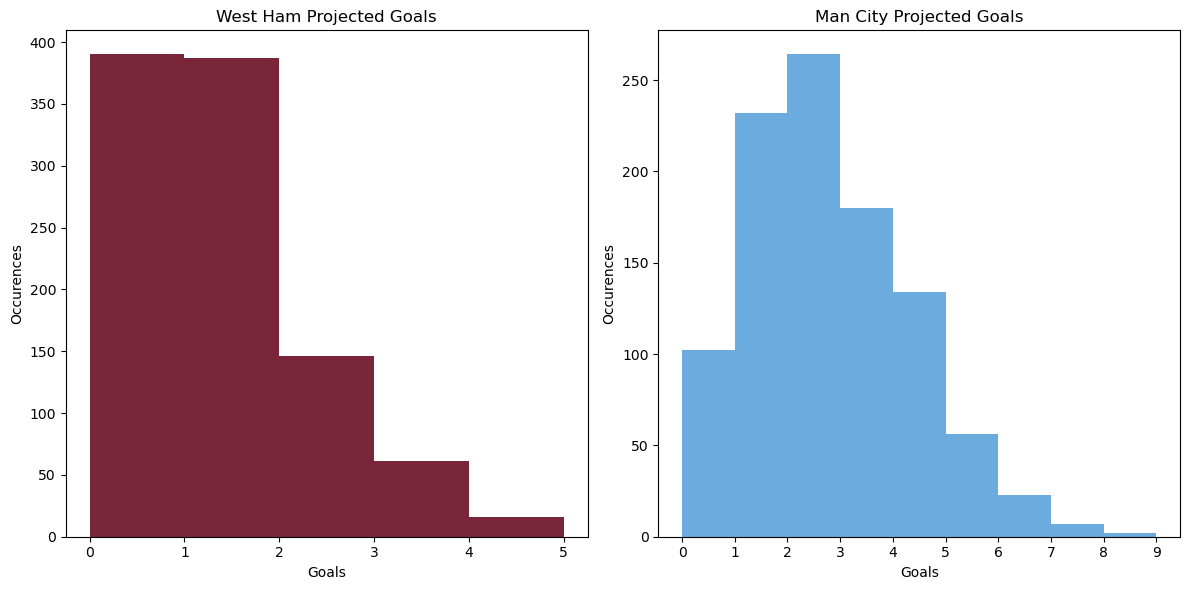

In [74]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.hist(west_ham_goals, bins = 5, color='#7A263A')
plt.title('West Ham Projected Goals')
plt.xlabel('Goals')
plt.ylabel('Occurences')
plt.xticks(np.arange(0, 6, 1))

plt.subplot(1,2,2)
plt.hist(man_city_goals, bins = 9, color='#6CABDD')
plt.title('Man City Projected Goals')
plt.xlabel('Goals')
plt.ylabel('Occurences')
plt.xticks(np.arange(0, 10, 1))

plt.tight_layout()
plt.show()

# SPI 

In [24]:
spi_df = pd.read_csv('spi_global_rankings.csv')

In [25]:
spi_df.head()

,rank,prev_rank,name,league,off,def,spi
0,1,1,Manchester City,Barclays Premier League,2.79,0.28,92.00
1,2,2,Bayern Munich,German Bundesliga,3.04,0.68,87.66
2,3,3,Barcelona,Spanish Primera Division,2.45,0.43,86.40
3,4,4,Real Madrid,Spanish Primera Division,2.56,0.60,84.41
4,5,5,Liverpool,Barclays Premier League,2.63,0.67,83.93


In [26]:
top_20 = spi_df.head(20).sort_values('spi', ascending=False)
#plt.barh(top_20['name'], top_20['spi'], color='blue')

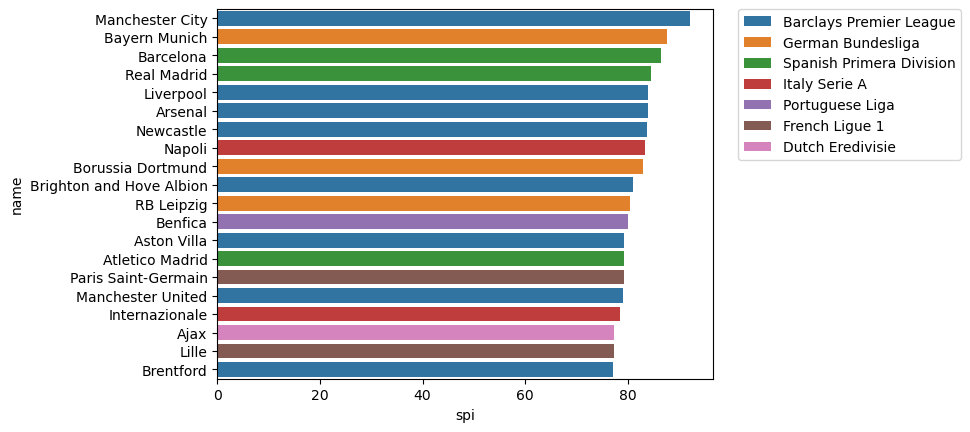

In [27]:
ax = sns.barplot(x='spi', y='name', data=top_20, hue='league',dodge=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [28]:
top_5_leagues = ['Barclays Premier League', 'German Bundesliga',
       'Spanish Primera Division', 'Italy Serie A','French Ligue 1']

In [29]:
top_5_spi_df = spi_df[spi_df.league.isin(top_5_leagues)]

In [30]:
top_5_spi_df['def'].corr(top_5_spi_df['spi'])

-0.9015665140601727

<Axes: xlabel='def', ylabel='spi'>

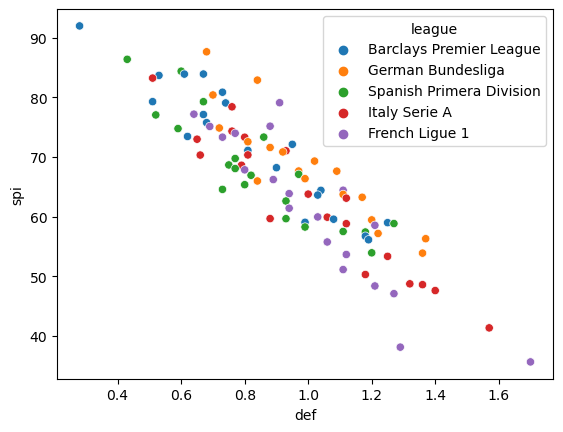

In [31]:
sns.scatterplot(x='def', y='spi', data=top_5_spi_df, hue='league')

In [32]:
top_5_spi_df['off'].corr(top_5_spi_df['spi'])

0.8973879976544833

<Axes: xlabel='off', ylabel='spi'>

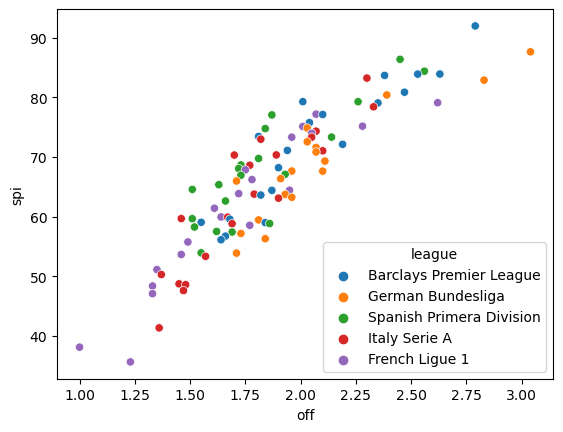

In [33]:
sns.scatterplot(x='off', y='spi', data=top_5_spi_df, hue='league')

In [34]:
top_5_spi_df['off'].corr(top_5_spi_df['def'])

-0.6366483766923691

<Axes: xlabel='off', ylabel='def'>

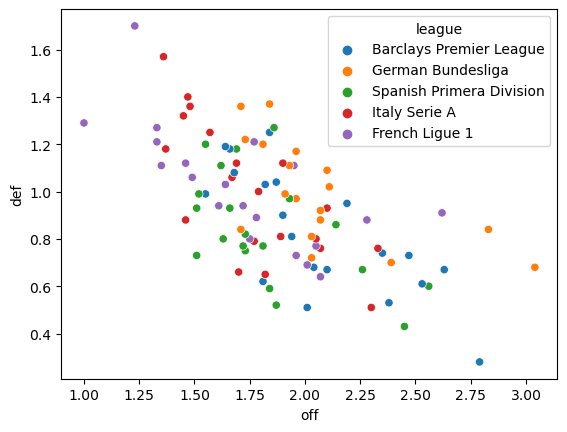

In [35]:
sns.scatterplot(x='off', y='def', data=top_5_spi_df, hue='league')

In [36]:
#spi_df.corr()
spi_df['off'].corr(spi_df['spi'])

0.9583501424571513

Text(2, 100, 'y = 34.8x - 1.96')

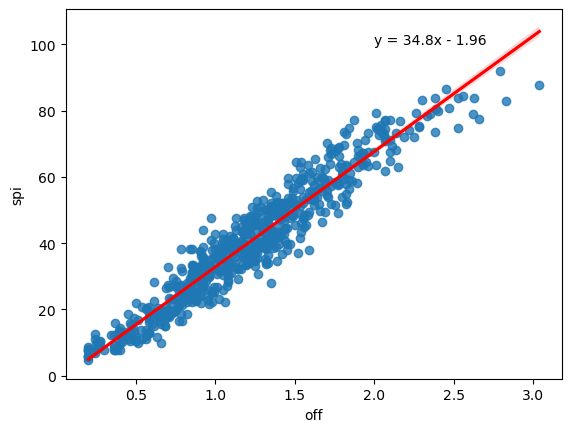

In [37]:
p = sns.regplot(x='off', y='spi', data=spi_df,
               line_kws={'color':'red'})
plt.text(2,100, 'y = 34.8x - 1.96')


In [38]:
slope, intercept, r, p, sterr = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),
                                                       y=p.get_lines()[0].get_ydata())

In [39]:
print(slope, intercept)

34.81739575935769 -1.9589318086849659


Regression formula for off and SPI is y=34.8x - 1.96